In [1]:
# Lotka-Volterra Precision Analysis: Euler vs RK4
# ------------------------------------------------
import numpy as np
import matplotlib.pyplot as plt
from methods import simulate
import seaborn as sns
import pandas as pd

# Parâmetros do modelo
alpha = 1.1
beta = 0.4
delta = 0.1
gamma = 0.4
x0 = 10
y0 = 5
tfinal = 30

# Lista de dt a testar
dt_values = [0.5, 0.4, 0.3, 0.2, 0.1, 0.05, 0.01]

In [2]:
# Obter "solução de referência" com RK4 muito preciso
t_ref, x_ref, y_ref = simulate(x0, y0, alpha, beta, delta, gamma, dt=0.001, t_final=tfinal, method="rk4")

def interp_ref(t_ref, x_ref, y_ref, t_target):
    x_interp = np.interp(t_target, t_ref, x_ref)
    y_interp = np.interp(t_target, t_ref, y_ref)
    return x_interp, y_interp

# Armazenar erros
errors_euler = []
errors_rk4 = []

for dt in dt_values:
    t_e, x_e, y_e = simulate(x0, y0, alpha, beta, delta, gamma, dt, tfinal, "euler")
    t_rk, x_rk, y_rk = simulate(x0, y0, alpha, beta, delta, gamma, dt, tfinal, "rk4")
    
    x_ref_e, y_ref_e = interp_ref(t_ref, x_ref, y_ref, t_e)
    x_ref_rk, y_ref_rk = interp_ref(t_ref, x_ref, y_ref, t_rk)

    err_e = np.mean(np.abs(np.array(x_e) - x_ref_e) + np.abs(np.array(y_e) - y_ref_e))
    err_rk = np.mean(np.abs(np.array(x_rk) - x_ref_rk) + np.abs(np.array(y_rk) - y_ref_rk))

    errors_euler.append(err_e)
    errors_rk4.append(err_rk)

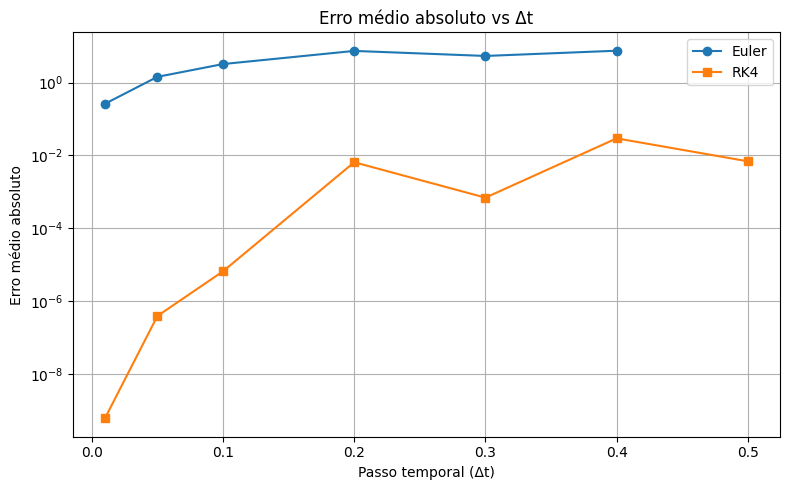

In [3]:
plt.figure(figsize=(8, 5))
plt.plot(dt_values, errors_euler, marker='o', label="Euler")
plt.plot(dt_values, errors_rk4, marker='s', label="RK4")
plt.xlabel("Passo temporal (Δt)")
plt.ylabel("Erro médio absoluto")
plt.title("Erro médio absoluto vs Δt")
plt.yscale("log")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

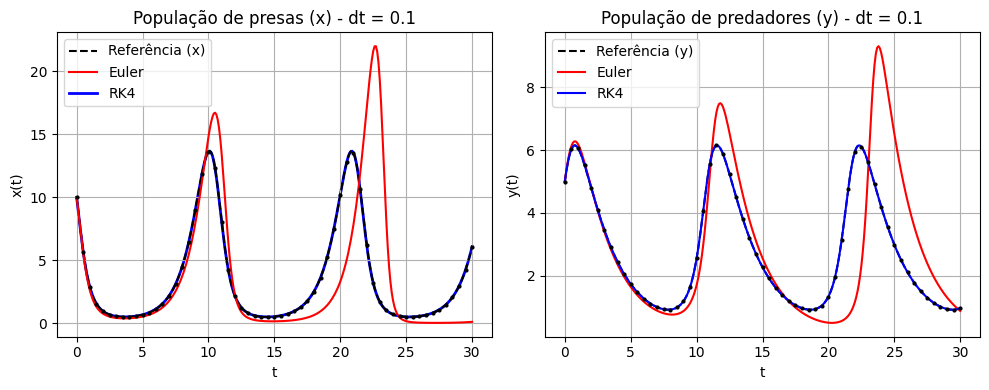

In [4]:
dt_example = 0.1
t_e, x_e, y_e = simulate(x0, y0, alpha, beta, delta, gamma, dt_example, tfinal, "euler")
t_rk, x_rk, y_rk = simulate(x0, y0, alpha, beta, delta, gamma, dt_example, tfinal, "rk4")

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(t_ref, x_ref, 'k--', linewidth=1.5, label="Referência (x)", zorder=2)
plt.plot(t_ref[::500], x_ref[::500], 'ko', markersize=2, zorder=3)
plt.plot(t_e, x_e, 'r-', label="Euler")
plt.plot(t_rk, x_rk, 'b-', label="RK4", linewidth=2.0, zorder=1)
plt.title(f"População de presas (x) - dt = {dt_example}")
plt.xlabel("t")
plt.ylabel("x(t)")
plt.grid(True)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(t_ref, y_ref, 'k--', linewidth=1.5, label="Referência (y)", zorder=2)
plt.plot(t_ref[::500], y_ref[::500], 'ko', markersize=2, zorder=3)
plt.plot(t_e, y_e, 'r-', label="Euler")
plt.plot(t_rk, y_rk, 'b-', label="RK4")
plt.title(f"População de predadores (y) - dt = {dt_example}")
plt.xlabel("t")
plt.ylabel("y(t)")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

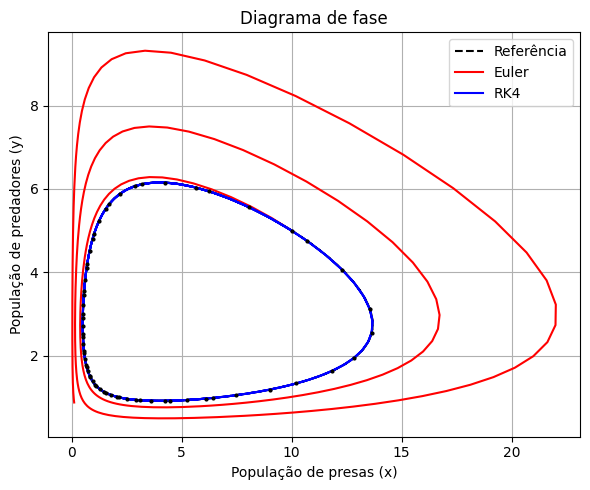

In [8]:
plt.figure(figsize=(6, 5))
plt.plot(x_ref, y_ref, 'k--', linewidth=1.5, label="Referência", zorder=2)
plt.plot(x_ref[::500], y_ref[::500], 'ko', markersize=2, zorder=3)
plt.plot(x_e, y_e, 'r-', label="Euler")
plt.plot(x_rk, y_rk, 'b-', label="RK4")
plt.xlabel("População de presas (x)")
plt.ylabel("População de predadores (y)")
plt.title("Diagrama de fase")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

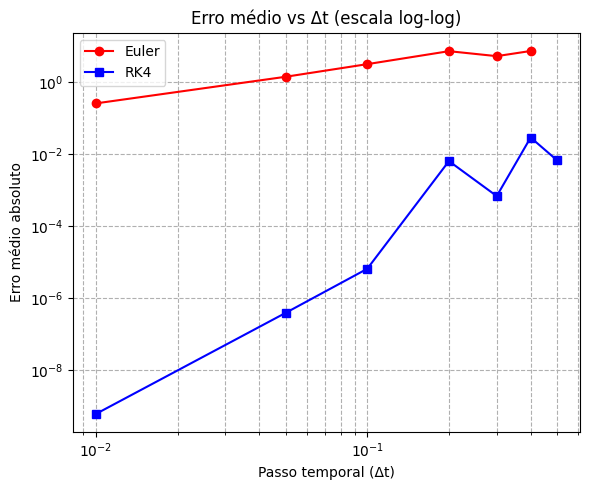

In [7]:
plt.figure(figsize=(6, 5))
plt.loglog(dt_values, errors_euler, 'ro-', label="Euler")
plt.loglog(dt_values, errors_rk4, 'bs-', label="RK4")
plt.xlabel("Passo temporal (Δt)")
plt.ylabel("Erro médio absoluto")
plt.title("Erro médio vs Δt (escala log-log)")
plt.grid(True, which="both", ls="--")
plt.legend()
plt.tight_layout()
plt.show()